# Image Alignment
**Satya Mallick, LearnOpenCV.com**

## Align an image to a template.
![alt text](image-alignment-using-opencv.jpg "Image Alignment")

## Theory

1. A **Homography** transforms a square to arbitrary quad. 

![alt text](motion-models.jpg "Motion Models")






## Theory
2. Images of two planes are related by a **Homography**
3. We need **4 corresponding points** to estimate Homography


!["Homography Example"](homography-example.jpg)|

In [1]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Read Tempalate and Scanned Image

In [2]:
# Read reference image
refFilename = "form.jpg"
print("Reading reference image : ", refFilename)
originalForm = cv2.imread(refFilename, cv2.IMREAD_COLOR)
originalForm = cv2.cvtColor(originalForm, cv2.COLOR_BGR2RGB)

# Read image to be aligned
imFilename = "scanned-form.jpg"
print("Reading image to align : ", imFilename)
scannedForm = cv2.imread(imFilename, cv2.IMREAD_COLOR)
scannedForm = cv2.cvtColor(scannedForm, cv2.COLOR_BGR2RGB)
  

Reading reference image :  form.jpg
Reading image to align :  scanned-form.jpg


Text(0.5, 1.0, 'Scanned Form')

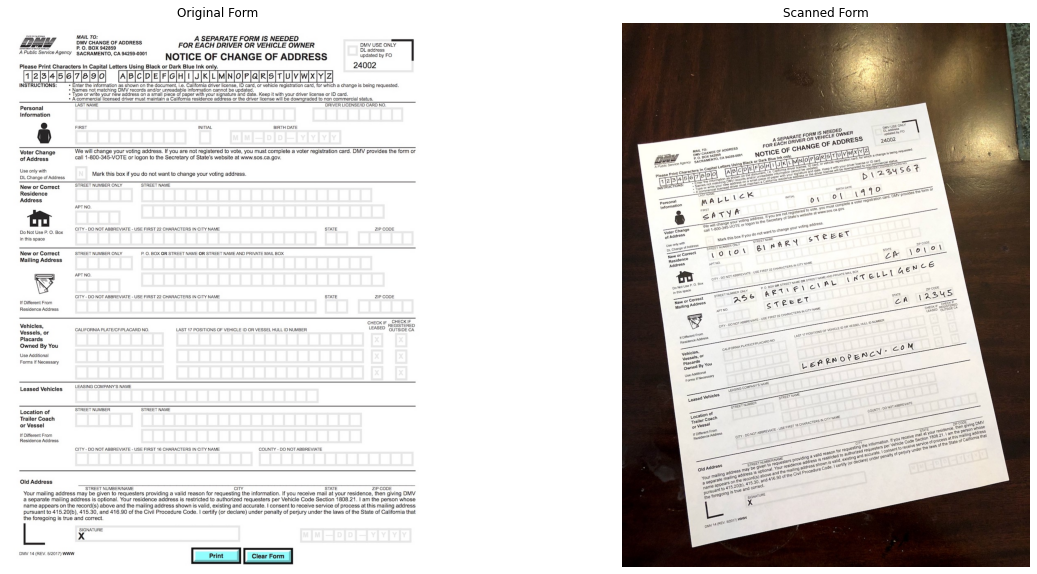

In [3]:
# Display Images

plt.figure(figsize=[20,10]); 
plt.subplot(121); plt.axis('off'); plt.imshow(originalForm); plt.title("Original Form")
plt.subplot(122); plt.axis('off'); plt.imshow(scannedForm); plt.title("Scanned Form")

## Step 2: Find keypoints in both Images

Think of keypoints as corner points that are stable under image transformations

In [5]:
# Convert images to grayscale
originalForm_gray = cv2.cvtColor(originalForm, cv2.COLOR_BGR2GRAY)
scannedForm_gray = cv2.cvtColor(scannedForm, cv2.COLOR_BGR2GRAY)
  

# Detect ORB features and compute descriptors.
MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(originalForm_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(scannedForm_gray, None)

# Display 
original_display = cv2.drawKeypoints(originalForm, keypoints1, outImage=np.array([]), color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
scanned_display = cv2.drawKeypoints(scannedForm, keypoints2, outImage=np.array([]), color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


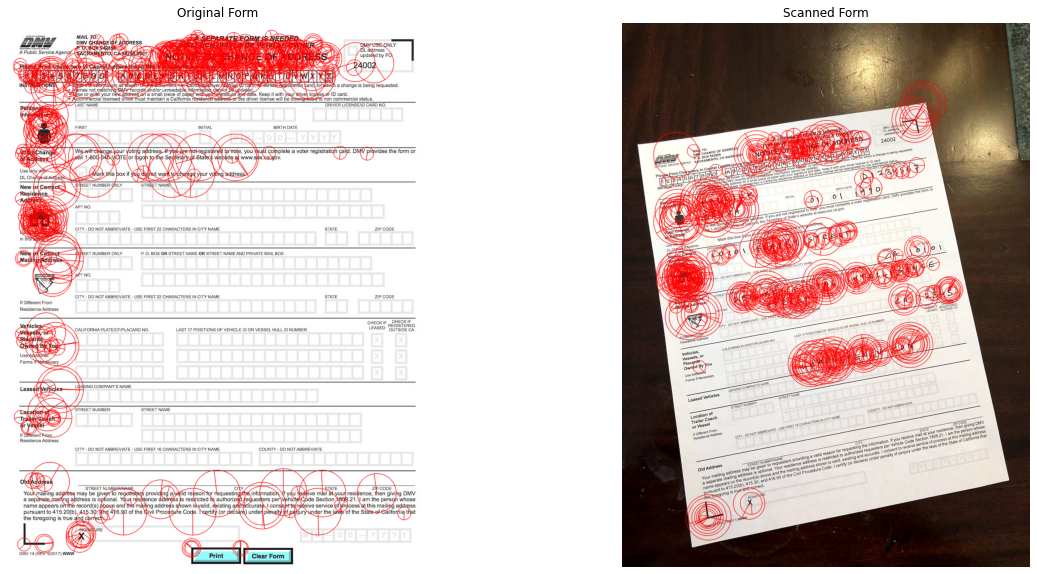

In [6]:
plt.figure(figsize=[20,10])
plt.subplot(121); plt.axis('off'); plt.imshow(original_display); plt.title("Original Form");
plt.subplot(122); plt.axis('off'); plt.imshow(scanned_display); plt.title("Scanned Form");

## Step 3 : Match keypoints in the two image

In [7]:
# Match features.
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)
  
# Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)

# Remove not so good matches
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]


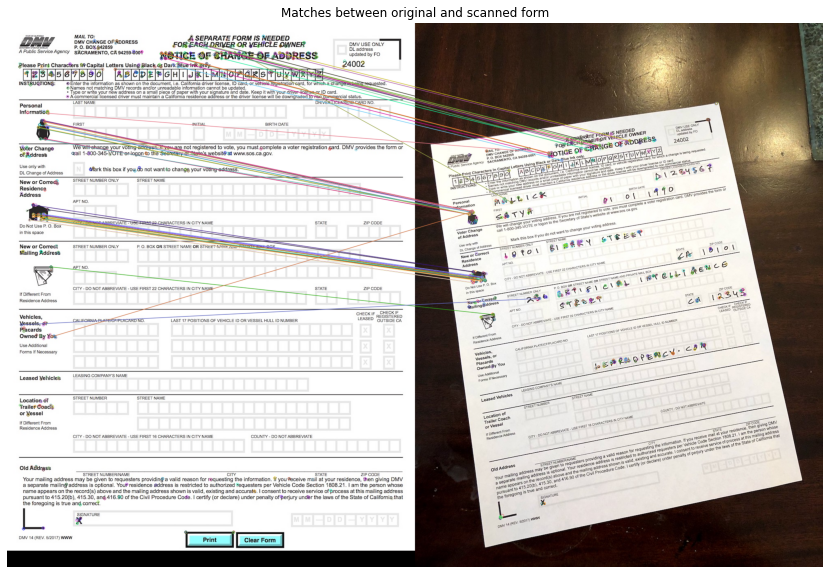

In [9]:
# Draw top matches
form_matches = cv2.drawMatches(originalForm, keypoints1, scannedForm, keypoints2, matches, None)

plt.figure(figsize=[40,10])
plt.imshow(form_matches); plt.axis('off'); plt.title("Matches between original and scanned form");


## Step 4:  Find Homography



In [10]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
  points1[i, :] = keypoints1[match.queryIdx].pt
  points2[i, :] = keypoints2[match.trainIdx].pt
  
# Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

## Step 5: Warp image

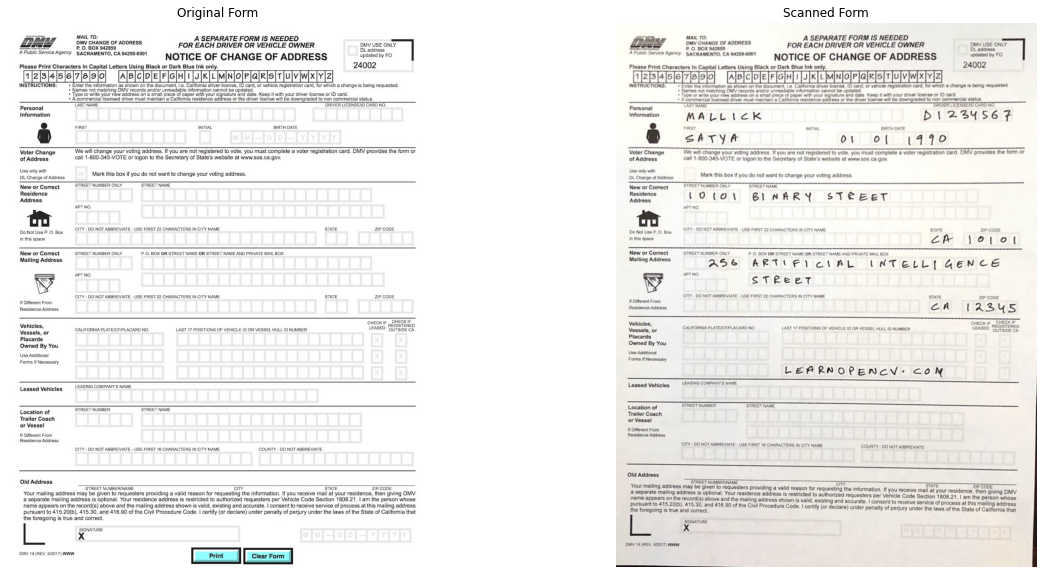

In [11]:
# Use homography to warp image
height, width, channels = originalForm.shape
scannedForm_reg = cv2.warpPerspective(scannedForm, h, (width, height))
# Display results 
plt.figure(figsize=[20,10]); 
plt.subplot(121); plt.imshow(originalForm); plt.axis('off'); plt.title("Original Form");
plt.subplot(122); plt.imshow(scannedForm_reg); plt.axis('off'); plt.title("Scanned Form");